# <center>SNN with Multiple Dimension Input</center>

<div align="center">
    <img src="./image/Screenshot from 2023-06-17 21-58-14.png" width="700">
</div>

+ Sample llà ảnh đen trắng kích thước 28x28
+ Có 100 Neural ở tầng ẩn, 10 Neural ở tầng đầu ra
+ Tầng ẩn dùng hàm tác đông là hàm Sigmoid, tầng đầu ra dùng hàm tác động là Softmax
+ Do dùng hàm Softmax, học các bộ trọng số khác nhau cho từng nhãn, vì vậy cân 10 Neural, vì mỗi Neural chỉ có 1 bộ trọng số, 1 Neural ko thể có nhiều hơn 1 bộ trọng số w
+ Hàm lỗi là hàm crossEntropy sử dụng cho phân loại nhiều hơn 2 nhãn

In [1]:
import torch
from torch import nn, optim, sigmoid
from torch.utils.data import Dataset, DataLoader 
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Create Dataset

Train Size: 60000
Valid Size: 60000
Sample Dimension: torch.Size([1, 28, 28])


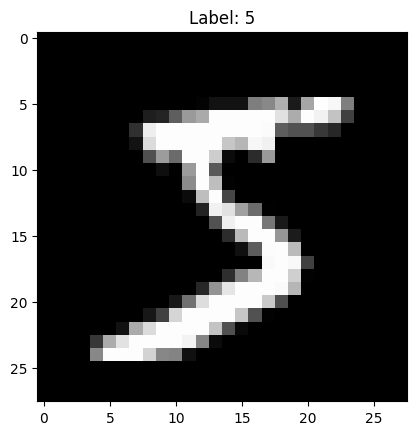

In [2]:
train_dataset = dataset.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dataset.MNIST(root='./data', download=True, transform=transforms.ToTensor())

# View feature
print(f'Train Size: {len(train_dataset)}')
print(f'Valid Size: {len(validation_dataset)}')
print(f'Sample Dimension: {train_dataset[0][0].shape}')

# view Image
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')
plt.title(f'Label: {train_dataset[0][1]}')
plt.show()

## Create Module

    

In [3]:
class SNN(nn.Module):
    def __init__(self, input_dim, H, output_dim):
        super(SNN, self).__init__()
        self.linear1 = nn.Linear(input_dim, H)    # hidden layer 
        self.linear2 = nn.Linear(H, output_dim)   # output layer
    
    def forward(self, x):
        z1 = sigmoid(self.linear1(x))
        z2 = self.linear2(z1)
        return z2

criterion = nn.CrossEntropyLoss()

## Create Model, DataLoader, Opitmazer

In [4]:
input_dim = 28 * 28   # Số Neural ở tầng đầu vào 
output_dim = 10       # Số Neural ở tầng đâu ra
H = 1                 # Số Neural ở tầng ẩn
model = SNN(input_dim, H, output_dim)
trainloader = DataLoader(dataset=train_dataset, batch_size=1)
validloader = DataLoader(dataset=validation_dataset, batch_size=1)
optimazer = optim.SGD(model.parameters(), lr=0.01)

## Training


In [5]:
COST = {'cost_train': [], 'cost_valid': []}
ACC = []
def training(epochs):
    for epoch in range(epochs):
        total_loss = 0    # Lưu tổng lỗi của 1 chu kì 
        for X,y in trainloader:
            Z = model(X.view(-1, input_dim))
            loss = criterion(Z, y)
            optimazer.zero_grad()
            loss.backward()
            optimazer.step()
            total_loss += loss.item()
            
        COST['cost_train'].append(total_loss / len(train_dataset))
        
        # validing
        total_loss = 0
        correct = 0    # số sample đoán đúng nhãn
        for X,y in validloader:
            Z = model(X.view(-1, input_dim))
            loss = criterion(Z, y)
            total_loss += loss
            _, yhat = torch.max(Z, 1)     
            correct += (y==yhat).item()

        COST['cost_valid'].append(total_loss / len(validation_dataset))
        ACC.append(100 * correct/len(validation_dataset))

In [7]:
training(1)

## Show Result